In [ ]:
#default_exp face_dataset_unlabeled

In [ ]:
#export
from fastai import *
from fastai.vision import *
from pathlib import Path
import cv2

In [ ]:
#export
import pickle

def read_dict(path):
    with open(path, 'rb') as handle:
        unserialized_data = pickle.load(handle)
    return unserialized_data

def save_dict(dictionary, path):
    with open(path, 'wb') as handle:
        pickle.dump(dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

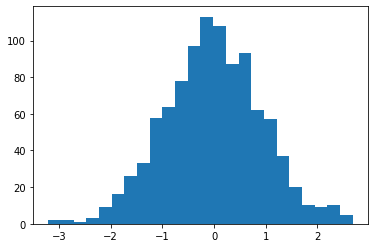

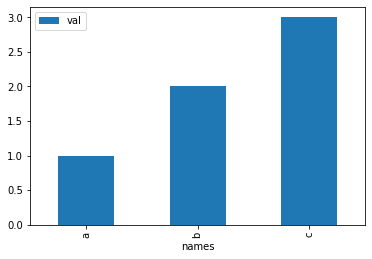

In [ ]:
import matplotlib.pyplot as plt

def plot(im, figsize=None): # im - np.arr(h,w,3), figsize - tuple(2)
    ax = plt.figure(figsize=figsize)
    if len(im.squeeze().shape) == 2: plt.imshow(im, cmap='gray')
    else: plt.imshow(im)
    return plt.show()

def plot_histogram(arr, title=None): # arr of size [n]
    _ = plt.hist(arr, bins='auto')  # arguments are passed to np.histogram
    plt.title(title)
    plt.show()
    
def plot_categories(names, values, title='names'): # arr of size [n]
    df = pd.DataFrame({title:listify(names), 'val':listify(values)})
    df.plot.bar(x=title, y='val', rot=90)

plot_histogram( np.random.RandomState(10).normal(size=1000) )
plot_categories(['a','b','c'], [1,2,3])

In [ ]:
#export
# if value is None then it is skipped
expression_map_default = {
    'Unspecified': 0,
    'Neutral': 1,
    'Smile': 2,
    'SmileOpenedJaw': 3,
    'RaisedBrows': 4,
    'EyesAway': 5,
    'Squinting': 6,
    'Frowning': 7,
    'Unknown': 0
}
gender_map_default = {
    'Unspecified': 0,
    'Unknown': 0,
    'Male': 1,
    'Female': 2
}
icao_map_default = {
    'None': 0,
    'FaceNotDetected': 1,
    'RollLeft': 2,'RollRight': 3,'YawLeft': 4,'YawRight': 5,'PitchUp': 6,'PitchDown': 7,
    'TooNear': 8,'TooFar': 9,'TooNorth': 10,'TooSouth': 11,'TooEast': 12,'TooWest': 13,
    'Sharpness': 14,
    'BackgroundUniformity': 15,
    'GrayscaleDensity': 16,
    'Saturation': 17,
    'Expression': 18,
    'DarkGlasses':19,
    'Blink': 20,
    'MouthOpen': 21,
    'LookingAway': 22,
    'RedEye': 23,
    'FaceDarkness': 24,
    'UnnaturalSkinTone': 25,
    'WashedOut': 26,
    'Pixelation': 27,
    'SkinReflection': 28,
    'GlassesReflection': 29
}
properties_map_default = {
    'NotSpecified': 0,
    'Specified': 0,
    'Glasses': 1,
    'Mustache': 2,
    'Beard': 3,
    'TeethVisible': 4,
    'Blink': 5,
    'MouthOpen': 6,
    'LeftEyePatch': 7,
    'RightEyePatch': 8,
    'BothEyePatch': 9,
    'DarkGlasses': 10,
    'DistortingCondition': 11,
    'Hat': 12,
    'Scarf': 13,
    'NoEar': 14
}

In [ ]:
#export
# format: (type,default_number,...)
# default_number: if number == 254 and is scalar: then swap it with this number
#   if number is multi: then this value is a map from values to labels {'1': 'true', '2': 'unknown', '3': 'true',...}
lbl_config = {
 'Age': ('scalar', 1, 2),
 'BackgroundUniformity': ('scalar', 1, 2),
 'BeardConfidence': ('scalar', 1, 2),
 'BlinkConfidence': ('scalar', 1, 2),
 'Contrast': ('scalar', 1, 2),
 'DarkGlassesConfidence': ('scalar', 1, 2),
 'DetectionConfidence': ('scalar', 1, 2),
 'EmotionAngerConfidence': ('scalar', 1, 2),
 'EmotionContemptConfidence': ('scalar', 1, 2),
 'EmotionDisgustConfidence': ('scalar', 1, 2),
 'EmotionFearConfidence': ('scalar', 1, 2),
 'EmotionHappinessConfidence': ('scalar', 1, 2),
 'EmotionNeutralConfidence': ('scalar', 1, 2),
 'EmotionSadnessConfidence': ('scalar', 1, 2),
 'EmotionSurpriseConfidence': ('scalar', 1, 2),
 'EthnicityAsianConfidence': ('scalar', 1, 2),
 'EthnicityBlackConfidence': ('scalar', 1, 2),
 'EthnicityHispanicConfidence': ('scalar', 1, 2),
 'EthnicityIndianConfidence': ('scalar', 1, 2),
 'EthnicityWhiteConfidence': ('scalar', 1, 2),
 'ExpressionConfidence': ('scalar', 1, 2),
 'FaceDarknessConfidence': ('scalar', 1, 2),
 'GenderConfidence': ('scalar', 1, 2),
 'GlassesConfidence': ('scalar', 1, 2),
 'GlassesReflectionConfidence': ('scalar', 1, 2),
 'GrayscaleDensity': ('scalar', 1, 2),
 'HatConfidence': ('scalar', 1, 2),
 'LivenessScore': ('scalar', 1, 2),
 'LivenessTargetPitch': ('scalar', 1, 2),
 'LivenessTargetYaw': ('scalar', 1, 2),
 'LookingAwayConfidence': ('scalar', 1, 2),
 'MouthOpenConfidence': ('scalar', 1, 2),
 'MustacheConfidence': ('scalar', 1, 2),
 'Noise': ('scalar', 1, 2),
 'Pitch': ('scalar float', 1, 2),
 'PixelationConfidence': ('scalar', 1, 2),
 'Quality': ('scalar', 1, 2),
 'RedEyeConfidence': ('scalar', 0, 2),
 'Roll': ('scalar float', 1, 2),
 'Saturation': ('scalar', 1, 2),
 'Sharpness': ('scalar', 1, 2),
 'SkinReflectionConfidence': ('scalar', 1, 2),
 'UnnaturalSkinToneConfidence': ('scalar', 1, 2),
 'WashedOutConfidence': ('scalar', 1, 2),
 'Yaw': ('scalar float', 1, 2),
 'Expression': ('multi', expression_map_default, 2),
 'Gender': ('multi', gender_map_default, 2),
 'IcaoWarnings': ('multi', icao_map_default, 2),
 'LivenessAction': ('multi', None, 2),
 'Properties': ('multi', properties_map_default, 2),
 'BoundingRect': ('bbox', 1, 2),
 'FeaturePoints': ('pts', 1, 2),
 'LeftEyeCenter': ('pt', 1, 2),
 'MouthCenter': ('pt', 1, 2),
 'NoseTip': ('pt', 1, 2),
 'RightEyeCenter': ('pt', 1, 2)
}

In [ ]:
#export
icao_warnings = [
 'TooSouth',
 'TooFar',
 'RedEye',
 'YawRight',
 'TooEast',
 'SkinReflection',
 'UnnaturalSkinTone',
 'MouthOpen',
 'RollRight',
 'TooNear',
 'RollLeft',
 'Sharpness',
 'None',
 'TooNorth',
 'DarkGlasses',
 'GrayscaleDensity',
 'PitchDown',
 'Blink',
 'FaceDarkness',
 'LookingAway',
 'GlassesReflection',
 'WashedOut',
 'Expression',
 'Saturation',
 'TooWest',
 'Pixelation',
 'YawLeft',
 'PitchUp'
]

In [ ]:
# Expression Unknown
# Gender Unspecified
# LivenessAction None
# Properties Glasses, DarkGlasses

In [ ]:
#export
class config:
    DICT_PATH = "../data/face/unlabeled_fn2label.pkl"
    FACE_PATH = Path("/data/faces/")
    PATH = FACE_PATH/"unlabeled"
    IM_PATH = PATH/"images"

In [ ]:
#export
FACE_PATH = Path("/data/faces/")
PATH = FACE_PATH/"unlabeled"
IM_PATH = PATH/"images"
DNAMES = ['sof', 'lfw', 'fc', 'bioid', 'wiki']

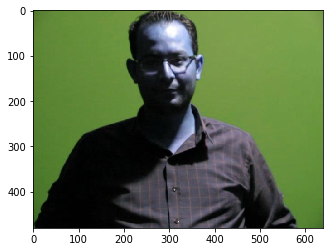

In [ ]:
plot(cv2.imread(str(IM_PATH/"sof_405.jpg")))

In [ ]:
read_json = lambda data_name: json.load(open(PATH/("labels_"+data_name+".txt")))
read_image_cv2 = lambda im_path: cv2.cvtColor(cv2.imread(str(IM_PATH/im_path)), cv2.COLOR_BGR2RGB)

In [ ]:
def parse_points(pts_string):
    ''' 'x,y,w,h' or 'x,y' '''
    return list(map(int, pts_string.split(',')))
    
def parse_feat_points(pts_string):
    ''' in form of: 'x,y|x,y|...' '''
    return [parse_points(pts) for pts in pts_string.split('|')]

In [ ]:
def parse_multi(icao_string):
    return [i.replace(' ','') for i in icao_string.split(',')]

In [ ]:
#export
pry_lbl2int = {'Pitch': 0, 'Roll': 1, 'Yaw': 2}
pitch_roll_yaw_mean = tensor([-8,0,0])
pitch_roll_yaw_std = tensor([6,6,8])

In [ ]:
def preprocess_answer(label, answer): # preprocess one answer
    config = lbl_config[label]
    if config[1] is None: return answer
    if 'scalar' in config[0]:
        if answer > 250: answer = config[1]
        if 'float' not in config[0]: answer = answer / 100.
    if 'multi' in config[0]:
        answer = list(set([config[1][lbl] for lbl in parse_multi(answer)]))
    if 'pt' == config[0] or 'bbox' in config[0]:
        answer = parse_points(answer)
    if 'pts' == config[0]:
        answer = parse_feat_points(answer)
#     if label in ['Pitch','Roll','Yaw']:
#         i = pry_lbl2int[label]
#         answer = (answer - pitch_roll_yaw_mean[i]) / pitch_roll_yaw_std[i]
    return answer

In [ ]:
def preprocess_face(face): # preprocess all answers in face
    for label, l_id in lbl2id.items():
        answer = face[l_id]
        face[l_id] = preprocess_answer(label, answer)
    return face

#### tests

In [ ]:
args = read_json('sof')['face_args']
def test_args():
    for data_name in DNAMES:
        assert (args == read_json(data_name)['face_args'])

# test_args()
lbl2id = {v:k for k,v in args.items()}

In [ ]:
def test_faces_len():
    for data_name in progress_bar(DNAMES):
        for j in read_json(data_name)['images']:
            path, faces = j['path'], j['faces']
            assert (len(faces) == 2)
# test_faces_len()

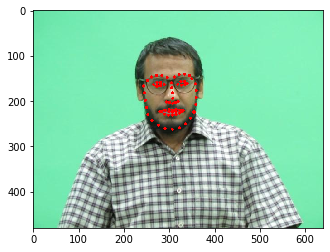

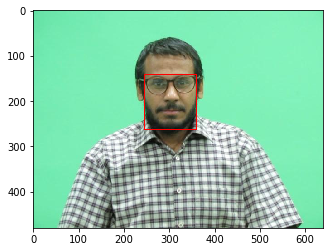

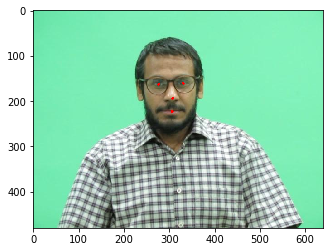

In [ ]:
for j in read_json('sof')['images']:
    im_orig, (face1, face2) = read_image_cv2(j['path']), j['faces']
    # feature points
    im = im_orig.copy()
    points = face1[lbl2id['FeaturePoints']]
    pts = parse_feat_points(points)
    for p in pts:
        im = cv2.circle(im, tuple(map(int, p)), 2, 255, 2)
    plot(im)
    # 
    im = im_orig.copy()
    points = face1[lbl2id['BoundingRect']]
    bb = parse_points(points)
    t,l,b,r = bb[0],bb[1],bb[2],bb[3]
    im = cv2.rectangle(im, (l,t), (r,b), 255, 2) 
    plot(im)
    # other
    im = im_orig.copy()
    other_pts = list(map(lambda p: parse_points(face1[lbl2id[p]]), ['LeftEyeCenter','RightEyeCenter','MouthCenter','NoseTip']))
    for p in other_pts:
        im = cv2.circle(im, tuple(map(int, p)), 2, 255, 2)
    plot(im)
    break

In [ ]:
# hypothesis: icao2 is subset of icao2
def get_icaos_list():
    icaos = set()
    for data_name in progress_bar(DNAMES):
        for j in read_json(data_name)['images'][:10]:
            face1, face2 = j['faces']
            face1, face2 = preprocess_face(face1), preprocess_face(face2)
            for label, l_id in lbl2id.items():
                answer = face1[l_id]
                if lbl_config[label][0] == 'scalar': scalar_stats[label].append(float(answer))
            icao1, icao2 = face1[lbl2id['IcaoWarnings']], face2[lbl2id['IcaoWarnings']]
            icao1, icao2 = parse_multi(icao1), parse_multi(icao2)
            for i in icao1 + icao2: icaos.add(i)
            assert len(icao1) >= len(icao2) # hypothesis?
    return list(icaos)

# icaos = get_icaos_list()

In [ ]:
# face 2 has and face 1 not:
# Contrast
# Noise
# Quality

# face 1 has and face 2 not:
# DetectionConfidence
# Pitch, Roll, Yaw

# noone has:
# MustacheConfidence
# LivenessTargetYaw
# LivenessTargetPitch
# LivenessScore
# HatConfidence
# GenderConfidence
# Ethnicity...
# Emotion...
# BeardConfidence
# Age

In [ ]:
def get_stats(preprocess=False):
    scalar_stats = defaultdict(lambda: [])
    multi_stats = defaultdict(lambda: defaultdict(lambda: 0))
    total_images = 0
    for data_name in progress_bar(DNAMES):
        for j in read_json(data_name)['images']:
#             im = read_image_cv2(j['path'])
            face1, face2 = j['faces']
            if preprocess: face1, face2 = preprocess_face(face1), preprocess_face(face2)
            total_images += 1
            for label, l_id in lbl2id.items():
                face = face2 if label in ['Contrast','Noise','Quality'] else face1
                answer = face[l_id]
                # append to stats
                if 'scalar' in lbl_config[label][0]: scalar_stats[label].append(float(answer))
                if 'multi' in lbl_config[label][0]: 
                    for lbl in answer: multi_stats[label][lbl] += 1
    return map(dict, [scalar_stats, multi_stats]), total_images

In [ ]:
# face 2 has and face 1 not:
# Contrast
# Noise
# Quality

# face 1 has and face 2 not:
# DetectionConfidence
# Pitch, Roll, Yaw

# noone has:
# MustacheConfidence
# LivenessTargetYaw
# LivenessTargetPitch
# LivenessScore
# HatConfidence
# GenderConfidence
# Ethnicity...
# Emotion...
# BeardConfidence
# Age

In [ ]:
(scalar_stats, multi_stats), total_images = get_stats(preprocess=True)
print('total:', total_images)

total: 86130


In [ ]:
# multi_stats

Gender has only 1 class


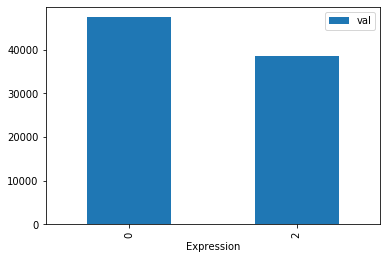

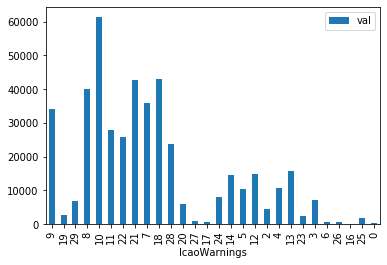

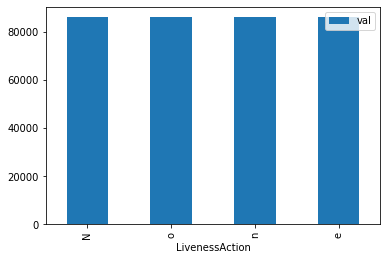

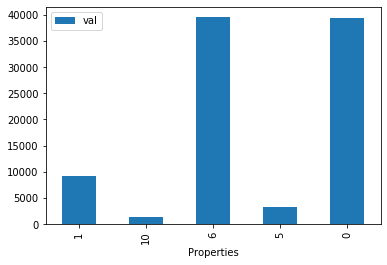

In [ ]:
for label, stats in multi_stats.items():
    if len(stats.keys()) == 1: print(label, 'has only 1 class')
    else: plot_categories(stats.keys(), stats.values(), title=label)

Age is not labeled


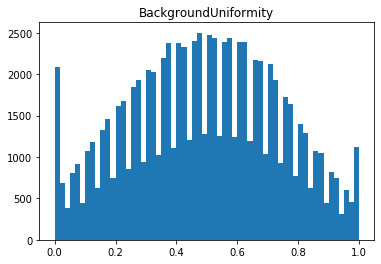

BeardConfidence is not labeled


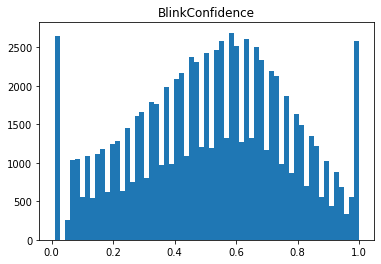

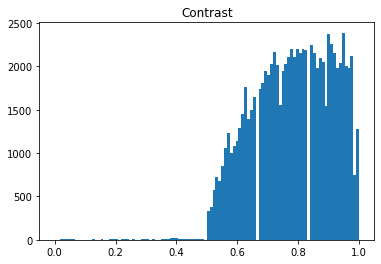

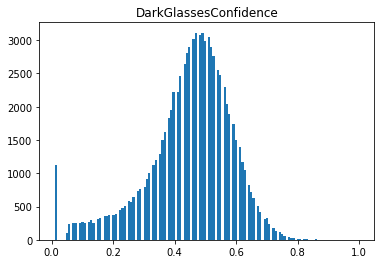

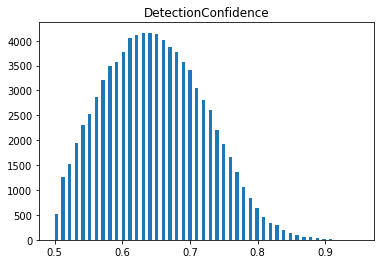

EmotionAngerConfidence is not labeled
EmotionContemptConfidence is not labeled
EmotionDisgustConfidence is not labeled
EmotionFearConfidence is not labeled
EmotionHappinessConfidence is not labeled
EmotionNeutralConfidence is not labeled
EmotionSadnessConfidence is not labeled
EmotionSurpriseConfidence is not labeled
EthnicityAsianConfidence is not labeled
EthnicityBlackConfidence is not labeled
EthnicityHispanicConfidence is not labeled
EthnicityIndianConfidence is not labeled
EthnicityWhiteConfidence is not labeled


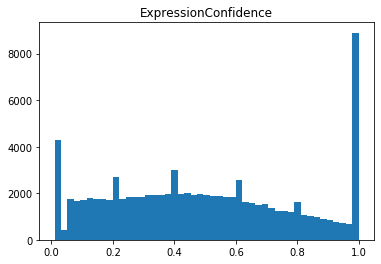

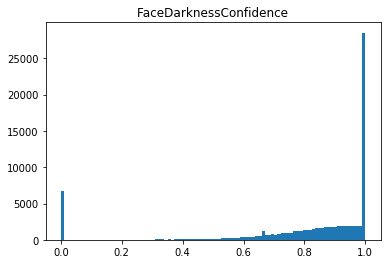

GenderConfidence is not labeled


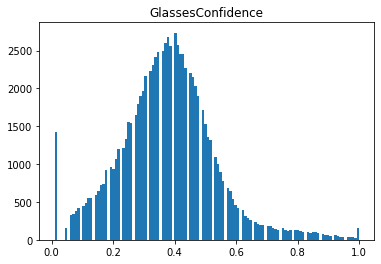

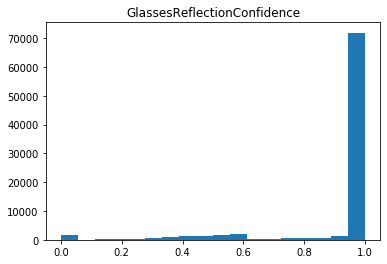

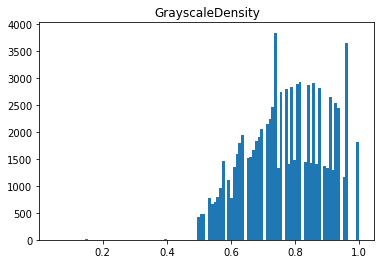

HatConfidence is not labeled
LivenessScore is not labeled
LivenessTargetPitch is not labeled
LivenessTargetYaw is not labeled


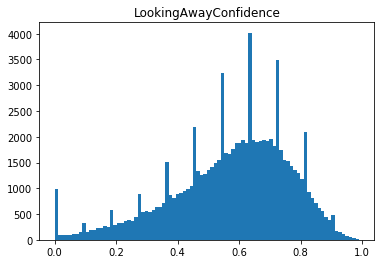

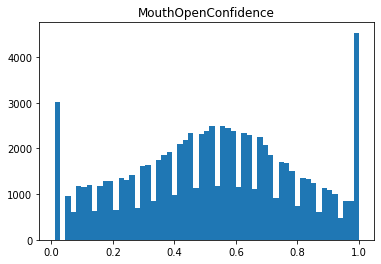

MustacheConfidence is not labeled


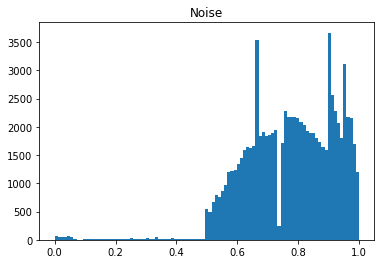

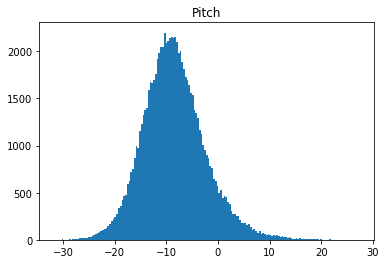

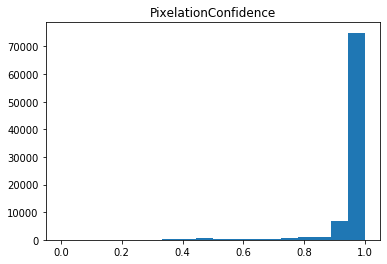

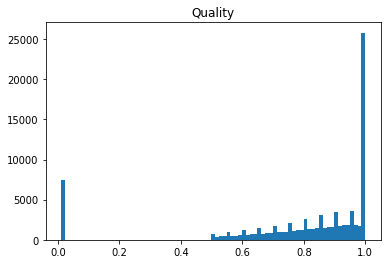

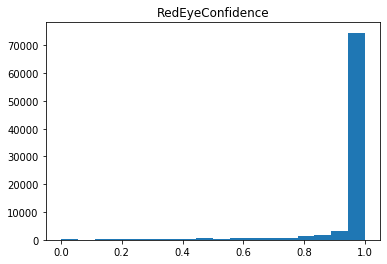

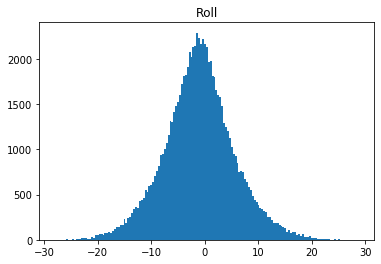

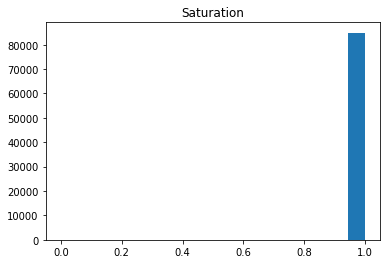

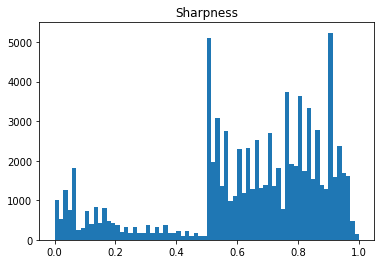

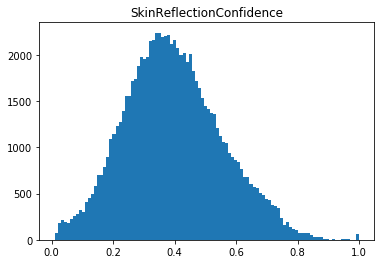

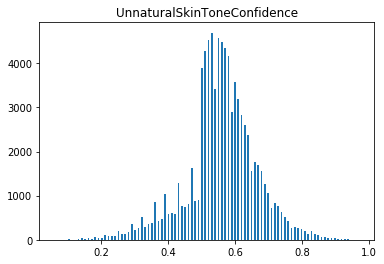

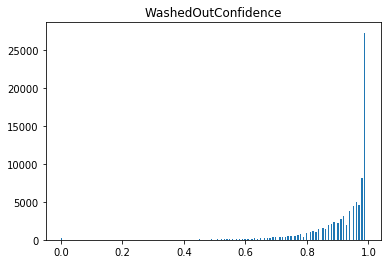

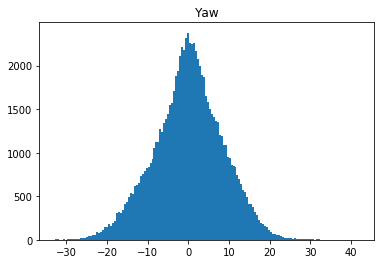

In [ ]:
def plot_scalars(scalar_stats):
    for label, scalar_list in scalar_stats.items():
        if np.array(scalar_list).std() == 0: print(label, 'is not labeled')
        else: plot_histogram(np.array(scalar_list), title=label)
plot_scalars(scalar_stats)

### Prepare

In [ ]:
for label, scalar_list in scalar_stats.items():
    if label in 'Yaw Pitch Roll':
        print(label, np.mean(scalar_list), np.std(scalar_list))

Pitch -8.439503816202 6.089512541532215
Roll -1.0136199364503673 6.548603755087979
Yaw 0.05415993420556171 8.474464950054154


In [ ]:
emotion_list = ['EmotionAngerConfidence','EmotionContemptConfidence','EmotionDisgustConfidence','EmotionFearConfidence','EmotionHappinessConfidence','EmotionNeutralConfidence','EmotionSadnessConfidence','EmotionSurpriseConfidence']
ethnicity_list = ['EthnicityAsianConfidence','EthnicityBlackConfidence','EthnicityHispanicConfidence','EthnicityIndianConfidence','EthnicityWhiteConfidence']
liveness_list = ['LivenessScore','LivenessTargetPitch','LivenessTargetYaw']
bad_scalar_list = ['Age', 'BeardConfidence','GenderConfidence','HatConfidence','MustacheConfidence']

In [ ]:
scalar_list = set(filter(lambda x: 'scalar' in lbl_config[x][0], lbl_config.keys()))
scalar_list = scalar_list - set(bad_scalar_list) - set(emotion_list) - set(ethnicity_list) - set(liveness_list)
scalar_list

{'BackgroundUniformity',
 'BlinkConfidence',
 'Contrast',
 'DarkGlassesConfidence',
 'DetectionConfidence',
 'ExpressionConfidence',
 'FaceDarknessConfidence',
 'GlassesConfidence',
 'GlassesReflectionConfidence',
 'GrayscaleDensity',
 'LookingAwayConfidence',
 'MouthOpenConfidence',
 'Noise',
 'Pitch',
 'PixelationConfidence',
 'Quality',
 'RedEyeConfidence',
 'Roll',
 'Saturation',
 'Sharpness',
 'SkinReflectionConfidence',
 'UnnaturalSkinToneConfidence',
 'WashedOutConfidence',
 'Yaw'}

In [ ]:
multi_list = set(filter(lambda x: 'multi' in lbl_config[x][0], lbl_config.keys()))
multi_list = multi_list - set(['LivenessAction', 'Gender', 'Properties'])
multi_list

{'Expression', 'IcaoWarnings'}

In [ ]:
pts_list = set(filter(lambda x: 'pt' in lbl_config[x][0], lbl_config.keys()))
pts_list

{'FeaturePoints', 'LeftEyeCenter', 'MouthCenter', 'NoseTip', 'RightEyeCenter'}

In [ ]:
def create_fn2labels_dict():
    out_dict = {}
    for data_name in progress_bar(DNAMES):
        for j in read_json(data_name)['images']:
            im_path, (face1, face2) = j['path'], j['faces']
            face1, face2 = preprocess_face(face1), preprocess_face(face2)
            kwargs = defaultdict(lambda: [])
            for i, (label, l_id) in enumerate(lbl2id.items()):
                if 'scalar' in lbl_config[label][0] and label not in scalar_list: continue
                if 'multi' in lbl_config[label][0] and label not in multi_list: continue
                if 'pt' in lbl_config[label][0] and label not in pts_list: continue
                face = face2 if label in ['Contrast','Noise','Quality'] else face1
                answer = face[l_id]
                kwargs[label].append(answer)
            # map to pytorch tensors
            kwargs = {k:(v, lbl_config[k][0]) for k,v in kwargs.items() if 'multi' not in lbl_config[k][0]}
            kwargs['Labels'] = (['Face'] * len(list(kwargs.values())[0][0]), 'class')
            out_dict[im_path] = kwargs
    return out_dict

In [ ]:
fn2labels = create_fn2labels_dict()

In [ ]:
save_dict(fn2labels, config.DICT_PATH)

In [ ]:
#export
def get_filename2bboxes_dict():
    return read_dict(config.DICT_PATH)

In [ ]:
#export
def create_df():
    fn2labels = get_filename2bboxes_dict()
    data = []
    for fn in fn2labels.keys():
        data.append((str(config.IM_PATH/fn), False, 'unlabeled'))
    return pd.DataFrame(data, columns=['image_path', 'valid', 'dataset'])

In [ ]:
create_df()

,image_path,valid,dataset
0,/data/faces/unlabeled/images/sof_1.jpg,False,unlabeled
1,/data/faces/unlabeled/images/sof_724.jpg,False,unlabeled
2,/data/faces/unlabeled/images/sof_404.jpg,False,unlabeled
3,/data/faces/unlabeled/images/sof_1277.jpg,False,unlabeled
4,/data/faces/unlabeled/images/sof_2491.jpg,False,unlabeled
...,...,...,...
86125,/data/faces/unlabeled/images/wiki_9986.jpg,False,unlabeled
86126,/data/faces/unlabeled/images/wiki_9987.jpg,False,unlabeled
86127,/data/faces/unlabeled/images/wiki_9988.jpg,False,unlabeled
86128,/data/faces/unlabeled/images/wiki_9990.jpg,False,unlabeled
